Data Cleaning Project

In [60]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [61]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [62]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [63]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Function that locates N/A data points and removes them from the dataset.

In [67]:
airbnb_subset = airbnb[['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
                        'price', 'minimum_nights', 'number_of_reviews', 'last_review',
                         'availability_365']]

In [68]:
airbnb_subset.isna().sum()

id                         0
host_id                    0
neighbourhood_group        0
neighbourhood              0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
availability_365           0
dtype: int64

In [69]:
def clear_na(dataset):
  if dataset.isna().sum().sum() > 0: 
    new_dataset = dataset.dropna()
    return new_dataset
  else:
    pass

clear_na(airbnb_subset)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,355
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0
5,5099,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,129
...,...,...,...,...,...,...,...,...,...,...
48782,36425863,83554966,Manhattan,Upper East Side,Private room,129,1,1,2019-07-07,147
48790,36427429,257683179,Queens,Flushing,Private room,45,1,1,2019-07-07,339
48799,36438336,211644523,Staten Island,Great Kills,Private room,235,1,1,2019-07-07,87
48805,36442252,273841667,Bronx,Mott Haven,Entire home/apt,100,1,2,2019-07-07,40


Function that creates a new dataset based off a column's 0 values (An archiving function in this specific case)

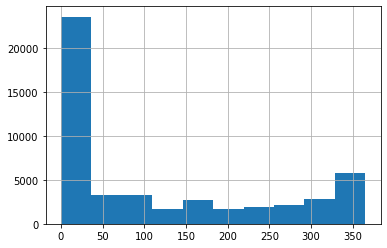

In [70]:
airbnb['availability_365'].hist()

In [71]:
def archive_data(dataset):
  column = str(input('Name of column: '))
  archived_data = dataset[dataset[column] == 0] 
  return archived_data

archive_data(airbnb) #archived_airbnb = airbnb[airbnb['availability_365'] == 0] 

Name of column: availability_365


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [72]:
#archived_airbnb = airbnb[airbnb['availability_365'] == 0] 

Function that ensures the longitude and latitude points are within NYS.

In [73]:
#Longitude: 71° 47' 25" W to 79° 45' 54" W
#Latitude: 40° 29' 40" N to 45° 0' 42" N
def in_ny(df):
  #df['in_ny'] = (df['longitude'].between(-79.4554, -71.4725)) & (df['latitude'].between(40.2940, 45.042))
  df = df[(df['longitude'].between(-79.4554, -71.4725)) & (df['latitude'].between(40.2940, 45.042))]
  return df

In [74]:
airbnb_ny = in_ny(airbnb)

In [75]:
airbnb_ny.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [76]:
#average price of certain room_type - bar graph
airbnb_df = pd.DataFrame(airbnb.head(), columns=["price","room_type"])
print(airbnb_df)

   price        room_type
0    149     Private room
1    225  Entire home/apt
2    150     Private room
3     89  Entire home/apt
4     80  Entire home/apt


In [77]:
grouped_df = airbnb_df.groupby("room_type")

mean_df = grouped_df.mean()

mean_df = mean_df.reset_index()

print(mean_df)

         room_type       price
0  Entire home/apt  131.333333
1     Private room  149.500000


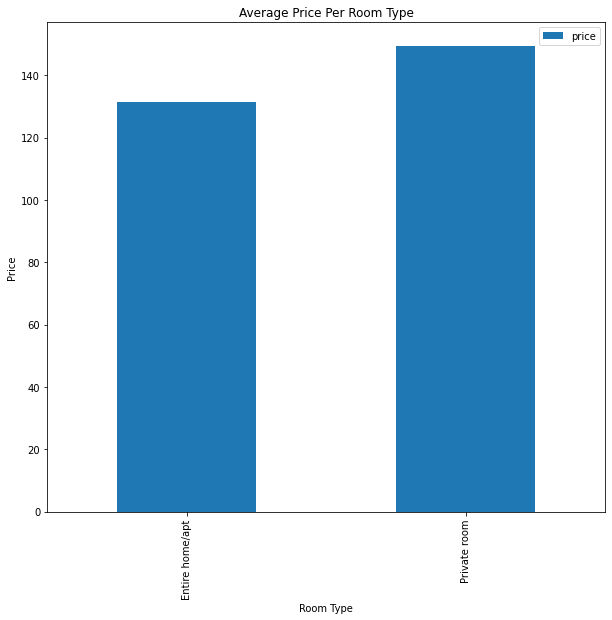

In [78]:
mean_df.plot(x="room_type", y="price", title = "Average Price Per Room Type", xlabel = "Room Type", ylabel = "Price", kind="bar", figsize=(10, 9))

In [79]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [80]:
within_ny = airbnb.groupby("neighbourhood_group")

mean_ny = within_ny.mean()

mean_ny = mean_ny.reset_index()

print(mean_ny)

  neighbourhood_group  ...  availability_365
0               Bronx  ...        165.758937
1            Brooklyn  ...        100.232292
2           Manhattan  ...        111.979410
3              Queens  ...        144.451818
4       Staten Island  ...        199.678284

[5 rows x 11 columns]


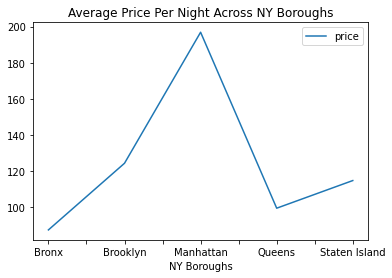

In [81]:
mean_ny.plot(x = 'neighbourhood_group', y = 'price', xlabel = "NY Boroughs", title = "Average Price Per Night Across NY Boroughs")

In [82]:
median_ny = within_ny.median()

median_ny = median_ny.reset_index()

print(median_ny)

  neighbourhood_group  ...  availability_365
0               Bronx  ...             148.0
1            Brooklyn  ...              28.0
2           Manhattan  ...              36.0
3              Queens  ...              98.0
4       Staten Island  ...             219.0

[5 rows x 11 columns]


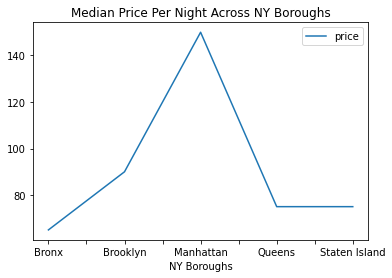

In [83]:
median_ny.plot(x = 'neighbourhood_group', y = 'price', xlabel = "NY Boroughs", title = "Median Price Per Night Across NY Boroughs")

In [84]:
mode_ny = within_ny['price'].apply(pd.Series.mode).iloc[:-1]
#.agg(pd.Series.mode)
#.iloc[:-1]

print(mode_ny)

neighbourhood_group   
Bronx                0     60
Brooklyn             0    100
Manhattan            0    150
Queens               0     50
Staten Island        0     75
Name: price, dtype: int64


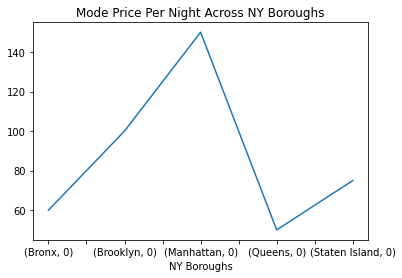

In [85]:
mode_ny.plot(x = 'neighbourhood_group', y = 'price', xlabel = "NY Boroughs", title = "Mode Price Per Night Across NY Boroughs")

In [86]:
#color map of price points of listings - either above or below average

In [87]:
#install geopython libraries
!apt install gdal-bin python-gdal python3-gdal
#install python3-rtree - Geopandas requirement
!apt install python3-rtree 
#install geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#install descartes - Geopandas requirement
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight

In [88]:
#import tools: NumPy for Advanced linear algebra, Matplotlib for Visualization and data plotting, Pandas for Data manipulation and analysis, Geopandas for programming geospatial data in python,  matplotlib.pyplot for plotting map
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt


In [89]:
# set the filepath and load in a shapefile
fp = 'tl_2016_36_cousub.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,017,55959,00979335,3601755959,Oxford,Oxford town,43,T1,G4040,None,None,None,A,155563470,911062,+42.3970735,-075.5962276,"POLYGON ((-75.67459 42.38286, -75.67432 42.382..."
1,36,017,57507,00979360,3601757507,Pharsalia,Pharsalia town,43,T1,G4040,None,None,None,A,100533128,774336,+42.5976196,-075.7338789,"POLYGON ((-75.79645 42.63828, -75.79172 42.638..."
2,36,017,58288,00979370,3601758288,Pitcher,Pitcher town,43,T1,G4040,None,None,None,A,73723336,37391,+42.5875820,-075.8279559,"POLYGON ((-75.88232 42.63770, -75.88167 42.637..."
3,36,017,59817,00979398,3601759817,Preston,Preston town,43,T1,G4040,None,None,None,A,90327313,443458,+42.5033261,-075.6103565,"POLYGON ((-75.67005 42.55087, -75.66985 42.550..."
4,36,017,66894,00979490,3601766894,Sherburne,Sherburne town,43,T1,G4040,None,None,None,A,112803620,51669,+42.6939737,-075.4812144,"POLYGON ((-75.55251 42.73940, -75.55138 42.739..."


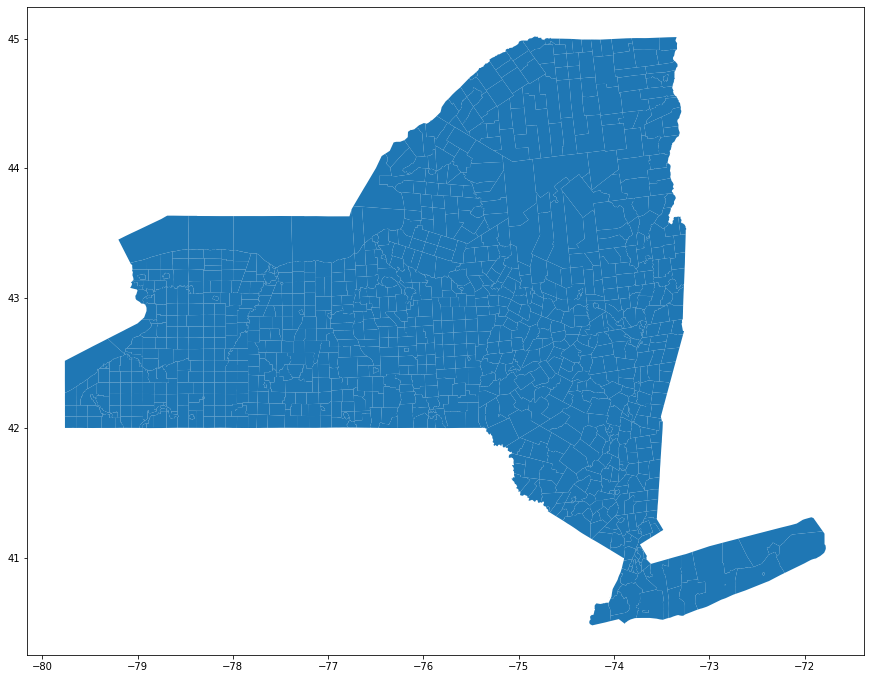

In [90]:
fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax)

In [91]:
df = pd.read_csv('AB_NYC_2019.csv', header=0)
crs = {'init': 'epsg:4326'}
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [92]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]

In [93]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


In [94]:
geo_df.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

array([-74.24442,  40.49979, -73.71299,  40.91306])

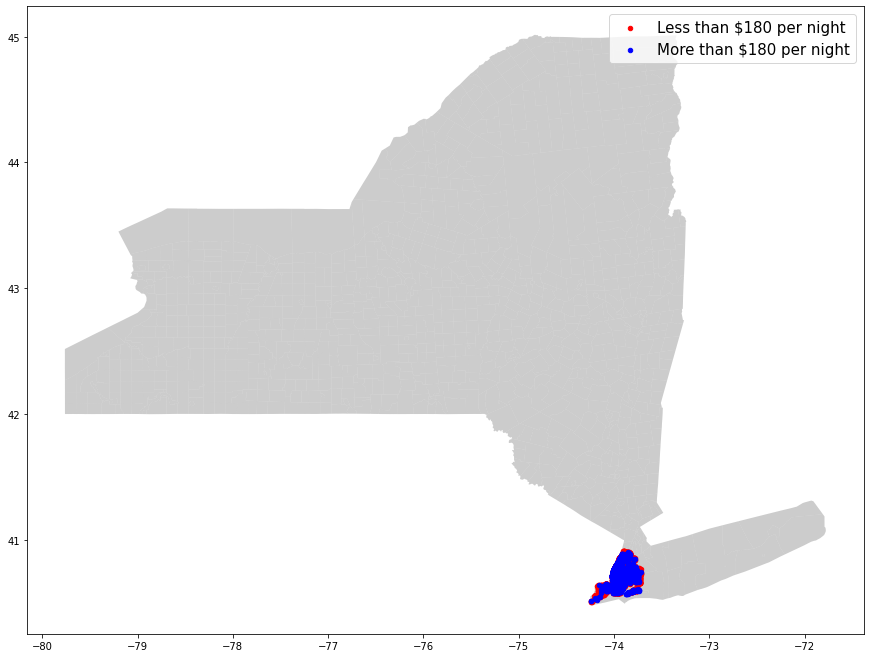

In [95]:
fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['price'] < 180].plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "Less than $180 per night")
geo_df[geo_df['price'] > 180].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "More than $180 per night")
plt.legend(prop={'size':15})

(40.49979, 40.91306)

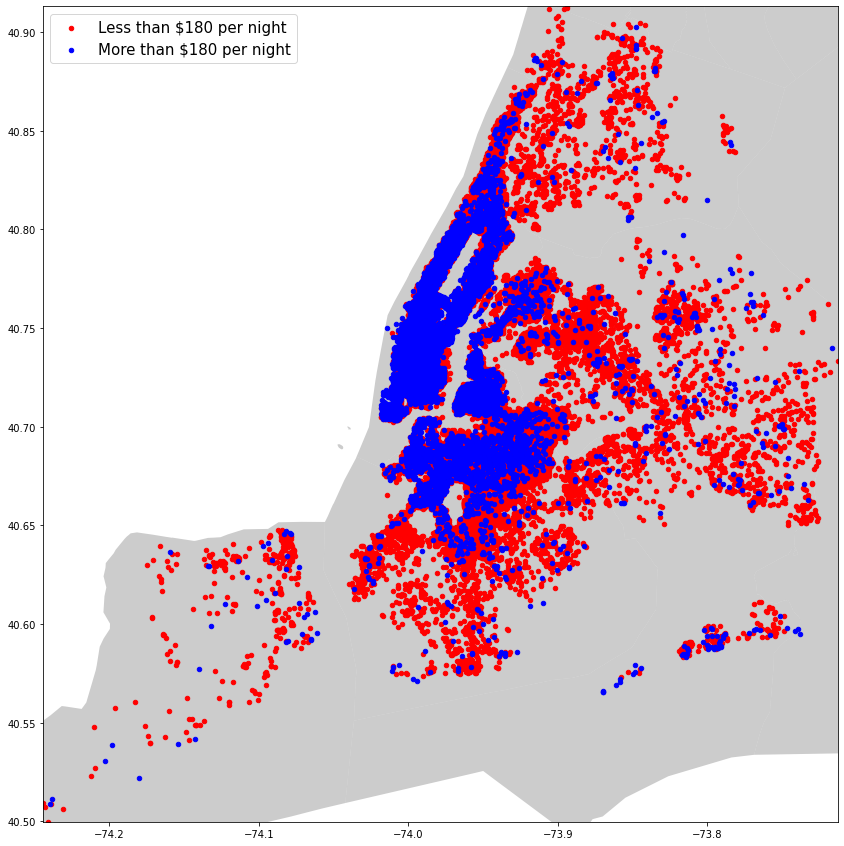

In [96]:
fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['price'] < 180].plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "Less than $180 per night")
geo_df[geo_df['price'] > 180].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "More than $180 per night")
plt.legend(prop={'size':15})

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

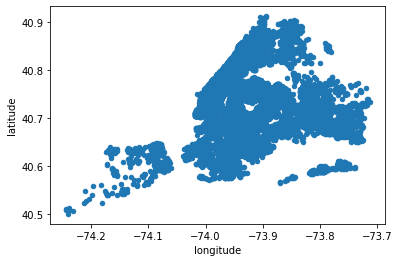

In [97]:
#making sure all latitude and longitude points are within nys
airbnb.plot(x = 'longitude', y = 'latitude', kind = 'scatter')